<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Univariate-Linear-Regression---Excersises" data-toc-modified-id="Univariate-Linear-Regression---Excersises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Univariate Linear Regression - Excersises</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Task 2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Task 3</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-1.0.3.1"><span class="toc-item-num">1.0.3.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Task 3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Task 4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>Task 5</a></span></li></ul></li></ul></li><li><span><a href="#Multivariate-Linear-Regression" data-toc-modified-id="Multivariate-Linear-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multivariate Linear Regression</a></span></li></ul></div>

In this Notebook you will work with a [Boston housing dataset](!https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10000 US dollars
- PTRATIO: pupil-teacher ratio by town 12. 
- B: 1000(Bk−0.63)**2 where Bk is the proportion of blacks by town 13. 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000s US dollars

In this notebook we are going to build models to predict house prices (MEDV).


# Univariate Linear Regression - Excersises

In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

### Task 1

Read the data from file **boston.csv** and check its main properties. 

**Hint:**
You may want to use the following methods:

- your_table_name.head() - prints out the first 5 lines of the table. This function is practical to get a basic idea of the data structure and potentially see some problems (e.g. missing values, wrong formats). 

- your_table_name.shape - prints out dimentions of the data (number of rows, number of columns)

- your_table_name.info() - general information about the variables, e.g. format, number of non-empty values

In [110]:
# read the data from boston.csv
boston_data = pd.read_csv('boston.csv')

In [111]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [112]:
boston_data.shape

(506, 14)

In [113]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Task 2

Another useful way to get initial impression from the data would be to visualise distributions of the variables in Boston Housing Dataset. Use ```your_dataset.hist(bins=50, figsize=(20,15))``` function for plotting. 

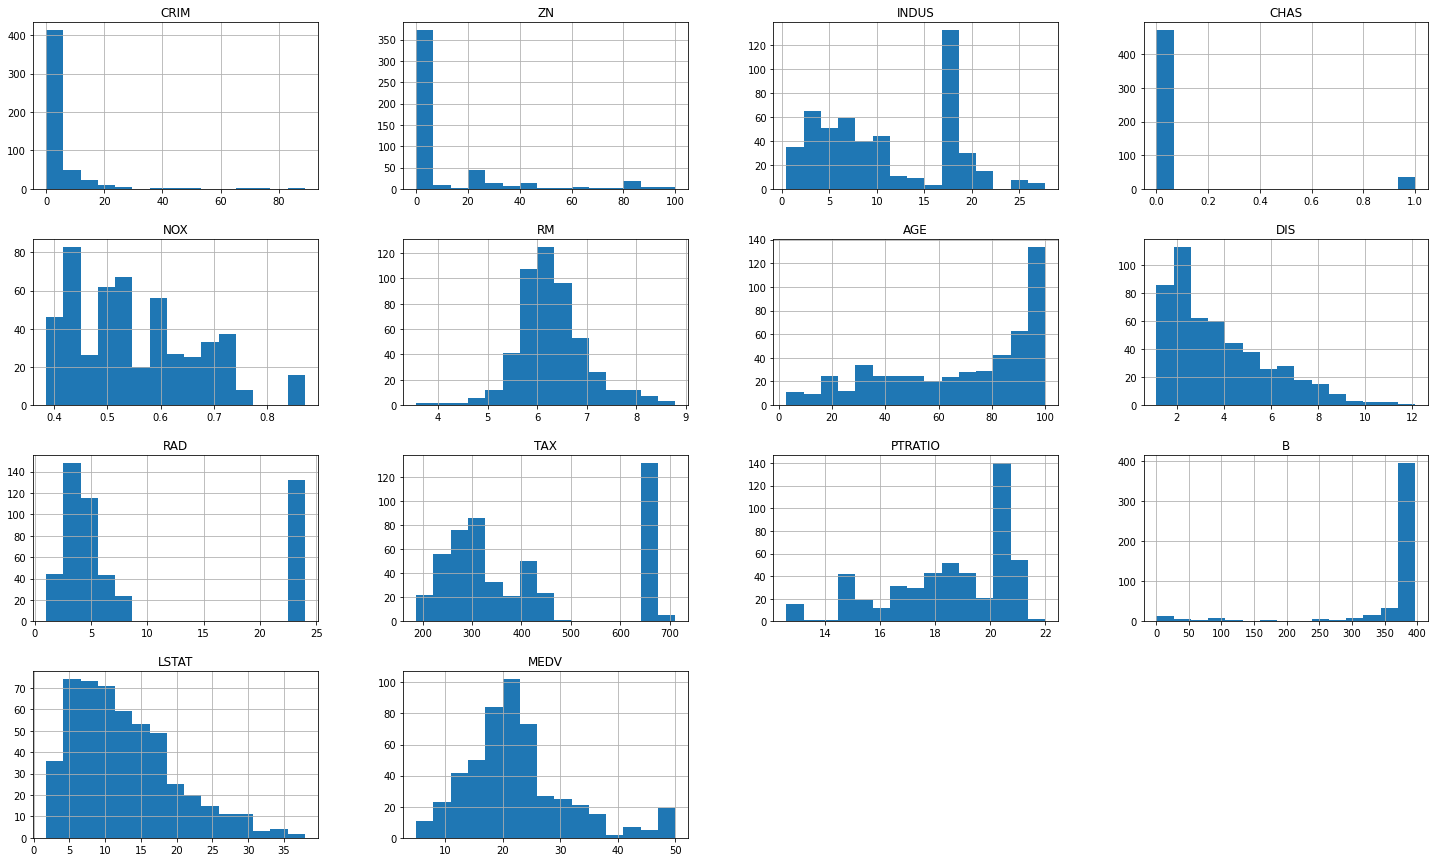

In [114]:
# Histogram
boston_data.hist(bins=15, figsize=(25,15))
plt.show()

### Task 3

Already at this stage you should think about the meaning of the variables and if they may be a defining factor for the house price. 

Choose 2-3 variables with the most intuitive connection to the target variable. Note in which direction you expect these variables to affect the target (e.g. LSTAT most probably has a negative effect on the house price, because the house prices intuitively should be lower in the districts with high percentage of low income population). 

To check your hypothesis, visualise the relation between dependent and independent variables using scatter plots and answer the following questions:  

- Does it look like your hypothesis was correct?
- What can you conclude about the relation between y and x? 
- Is the dependency linear (points concentrated around the straight line)? 
- Is there a strong dependency or rather weak (if the points form a clear pattern there is a strong dependency, if they are evenly distributed, the dependency is not that strong)
- Which of the variables you checked could be the best candidate for the future model and why?

**Hint:** use ```plt.scatter()``` function for plotting. 

#### Example
The example below illustrates the logic of analysing variable LSTAT (% lower status of the population). Try to reproduce the same analysis for any other 2-3 variables available in this dataset. 

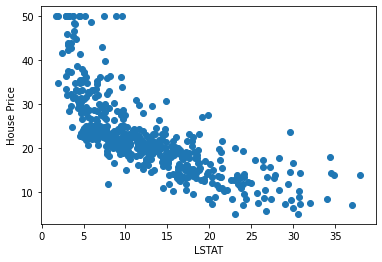

In [115]:
# define dependent and independent variables
y = boston_data['MEDV'].values
x1 = boston_data[['LSTAT']].values

# Create a scatter plot to check your hypothesis
plt.scatter(x1, y)
plt.xlabel('LSTAT')
plt.ylabel('House Price')
plt.show()

From the graph above we can see that LSTAT is negatively correlated with House Prices. We can confirm our original hypothesis. To model this kind of relation we could use either a linear function (fit a straight line to the data points), however we can see a slight illinearity as house prices are more sensitive for low values of LSTAT (left part of the graph with LSTAT less than 7 or 8). I expect this to be a strong variable, because we can see a clear pattern on the graph - the data points are concentrated around one line and it is easy to see the pattern. 

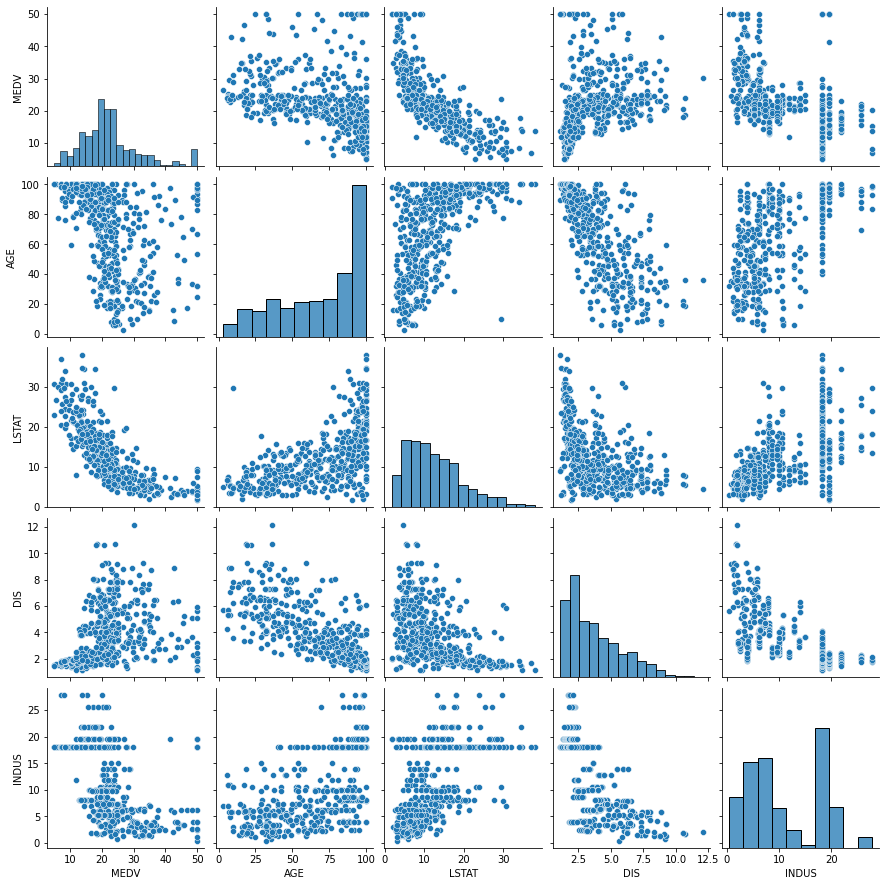

In [118]:
# another quicker way to get quick insights from the data is to use seaborn package
# pairplot function from seaborn package plot all the variables in the dataset against each other
# on the diagonal, where the variable is supposed to be plotted against itself we see the histograms

import seaborn as sns

sns.pairplot(boston_data[['MEDV', 'AGE', 'LSTAT', 'DIS', 'INDUS']])

### Task 3
Build a linear regression model regressing y on a chosen x. 

In [61]:
# define dependent and independent variables
y = boston_data['MEDV']
X = boston_data[['LSTAT']]

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (506, 1) 
 y_shape: (506,)


In [15]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [16]:
y_pred = reg.predict(X)

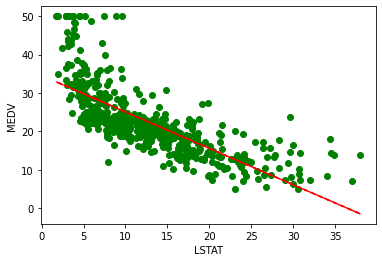

In [28]:
plt.scatter(X, y, c='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.plot(X, y_pred, linestyle='--', c='red')
plt.show()

In [23]:
# calculate R2 for train and test datasets
r2 = r2_score(y, y_pred)

print('R squared of Linear Regression with LSTAT variable:', r2)

R squared of Linear Regression with LSTAT variable: 0.5441462975864797


### Task 4

Split the data into train and test datasets and build all models using just training data. Estimate model performace using determination coefficient for both train and test datasets. Interpret the results

In [16]:
# split the dataset into train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# as a result of using train_test_split function both X and y are going to be splitted into 2 parts
# test_size parameter specifies the percentage of original dataset that will become test set
# random_state parameter ensures that sampling is reproducible

# test_size example: test_size = 0.2 -> we take 20% of all original data (506 rows) as test dataset 
# -> X_test will have 506*0.2=112 rows, y_test will also contain 112 numbers corresponding to the 
# same rows as chosen for X

# random_state example: 
# Let say X has just one feature (1 column) and just 10 observations (10 rows)
# X = [0,1,2,3,4,5,6,7,8,9]
# If we randomly pick 20% from X there are many ways to do that
# e.g. we could pick [0,1] or [3,9] or any other two numbers
# Because train_test_sample function performs RANDOM SAMPLING (chooses random 20% every time we run it)
# reruning the function will give us the different result every time we run it. To get the same result, 
# we fix random_state as some number (for example 42, but can be any other number)

In [17]:
# initiate and fit the model with X_train and y_train
uni_reg = LinearRegression()
uni_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# predict the house prices for X_train and X_test
y_pred_train = uni_reg.predict(X_train)
y_pred_test = uni_reg.predict(X_test)

In [19]:
# calculate R2 for train and test datasets
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print('R squared of Linear Regression for Train Date :', r2_train)
print('R squared of Linear Regression for Test Date :', r2_test)

R squared of Linear Regression for Test Date : 0.5253133800516232
R squared of Linear Regression for Train Date : 0.5591638673574242


Notice that there is a slight difference between R2 for train and test datasets. This is because for the model it is always easier to make predictions for the data that it has already "seen". The model is specifically optimised (this is happens when you run model.fit(X_train, y_train)) for the train dataset. 

If the difference between R2 for train and R2 for test datasets is large. This is an indication of overfitting. In this case, there is almost no difference, so risk of overfitting is very low. 

It may be the case, that R2 for test set is higher than for the train set. This is an indication of an opposite event called  - underfitting. Underfitting can be treated by including more variables into the model, or even choosing a different model. 

### Task 5

R2 is commonly used and powerful metric for evaluation of model fit. However, it is better to also check for other indicators as well. 

Implement the metrics you have learned: MAE, MSE and RMSE, and then compare the correctness of your functions with those available in the scikit-learn library.
For the records:

$$\begin{array}{rll} MAE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \left|y_i  - \hat{y_i}\right|
\end{array} $$

$$\begin{array}{rll} MSE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2
\end{array} $$

$$\begin{array}{rll} RMSE &=& \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2}
\end{array} $$

In [29]:
def mae(y_true, y_pred):
    n = y_true.size
    return sum(np.abs(y_true - y_pred)) / n

In [55]:
def mse(y_true, y_pred):
    n = y_true.size
    return np.sum((y_true - y_pred)**2) / n

In [56]:
from math import sqrt

def rmse(y_true, y_pred):
    n = y_true.size
    return sqrt(np.sum((y_true - y_pred)**2) / n)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_example = np.array([100, 103, 30, 28])
y_pred_example = np.array([92, 112, 19, 42])

# assert function compares two numbers. If they are equal there is no output, otherwise assertion
# error is going to be displayed 
assert mae(y_example, y_pred_example) == mean_absolute_error(y_example, y_pred_example)
assert mse(y_example, y_pred_example) == mean_squared_error(y_example, y_pred_example)
assert rmse(y_example, y_pred_example) == mean_squared_error(y_example, y_pred_example, squared=False)

In [58]:
mae(y_example, y_pred_example), mse(y_example, y_pred_example), rmse(y_example, y_pred_example)

10.5

In [121]:
# LSTAT
# Calculate MAE, MSE, RMSE for your model predictions

print('R2 on train: ', r2_score(y_train, y_pred_train))
print('R2 on test: ',r2_score(y_test, y_pred_test))
print('')
print('MAE on train: ', mean_absolute_error(y_train, y_pred_train))
print('MAE on test: ',mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE on train: ', mean_squared_error(y_train, y_pred_train)) 
print('MSE on test: ', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE on train: ', mean_squared_error(y_train, y_pred_train, squared = False))
print('RMSE on test: ', mean_squared_error(y_test, y_pred_test, squared = False))


R2 on train:  0.6958176813125246
R2 on test:  0.5319622146450895

MAE on train:  3.6334875387352548
MAE on test:  4.001862452183199

MSE on train:  26.425353410182435
MSE on test:  34.32298146205479

RMSE on train:  5.140559639784605
RMSE on test:  5.85858186441521


# Multivariate Linear Regression

In [72]:
# define dependent and independent variables
y = boston_data['MEDV']
# the most important part of building a regression is the variable choice
# feel free to experiment with a different set of variables
X = boston_data[['LSTAT', 'RM', 'DIS', 'AGE', 'CRIM', 'B']] 
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (506, 6) 
 y_shape: (506,)


In [73]:
X.head()

,LSTAT,RM,DIS,AGE,CRIM,B
0,4.98,6.575,4.0900,65.2,0.00632,396.90
1,9.14,6.421,4.9671,78.9,0.02731,396.90
2,4.03,7.185,4.9671,61.1,0.02729,392.83
3,2.94,6.998,6.0622,45.8,0.03237,394.63
4,5.33,7.147,6.0622,54.2,0.06905,396.90


In [ ]:
# split the data into train and test subsamples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the number of observations in train and test subsamples
X_train.shape, X_test.shape, len(y_train), len(y_test)

In [75]:
# initiate and fit the model
mult_reg = LinearRegression()
mult_reg.fit(X_train, y_train)

# make predictions for train and tests datasets
y_pred_train = mult_reg.predict(X_train)
y_pred_test = mult_reg.predict(X_test)

In [78]:
print('R2 on train: ', r2_score(y_train, y_pred_train))
print('R2 on test: ',r2_score(y_test, y_pred_test))
print('')
print('MAE on train: ', mean_absolute_error(y_train, y_pred_train))
print('MAE on test: ',mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE on train: ', mean_squared_error(y_train, y_pred_train)) 
print('MSE on test: ', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE on train: ', mean_squared_error(y_train, y_pred_train, squared = False))
print('RMSE on test: ', mean_squared_error(y_test, y_pred_test, squared = False))

R2:  0.6703639028486188
MAE:  3.708365705464086
MSE:  27.827733014570263
RMSE:  5.275199808023414
